In [1]:
import json
import os

import matplotlib.pyplot as plt

NERF_SYNTHETIC_SCENES = [
    "chair",
    "drums",
    "ficus",
    "hotdog",
    "lego",
    "materials",
    "mic",
    "ship",
]
MIPNERF360_UNBOUNDED_SCENES = [
    "garden",
    "bicycle",
    "bonsai",
    "counter",
    "kitchen",
    "room",
    "stump",
]
methods = ["Occupancy Grid", "Proposal Network", "Proposal Grid"]
cdict = {
    "Occupancy Grid": "red",
    "Proposal Network": "blue",
    "Proposal Grid": "green",
}
data_dir = {
    "Occupancy Grid": "occ_grid_v2",
    "Proposal Network": "prop_net",
    "Proposal Grid": "prop_grid",
}

synthetic
Occupancy Grid [30863, 26533, 26957, 18133, 25627, 29365, 22237, 8468, 25794, 26633, 10645, 1460]
Proposal Network [15172, 1275, 13553, 7440, 14594, 9822, 19263, 17156, 24489, 26042, 31236, 19076, 31978]
Proposal Grid [7196, 16226, 10581, 29989, 21491, 17173, 30868, 26299, 18627, 25316, 3179]


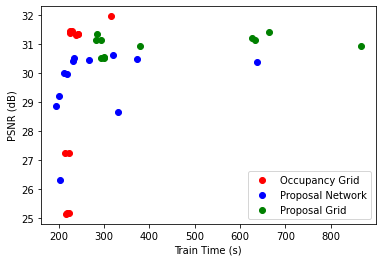

Occupancy Grid [30863, 26533, 26957, 18133, 25627, 29365, 22237, 8468, 25794, 26633, 10645, 1460]
Proposal Network [15172, 1275, 13553, 7440, 14594, 9822, 19263, 17156, 24489, 26042, 31236, 19076, 31978]
Proposal Grid [7196, 16226, 10581, 29989, 21491, 17173, 30868, 26299, 18627, 25316, 3179]


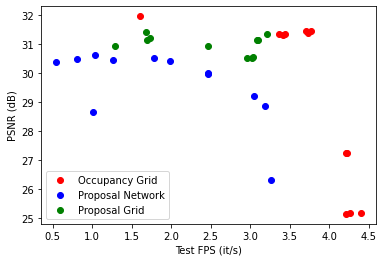

unbounded
Occupancy Grid [20930, 17672, 3605, 2827, 11907, 7326, 9562, 8488, 29310, 32420, 7367, 17269, 27198, 9609, 6583, 25602]
Proposal Network [29669, 6432, 15934, 17773, 28320, 12530, 15625, 3980, 12070, 17700, 18247, 32414, 5588, 29908, 23941, 10089, 70, 6283, 940, 24194]
Proposal Grid [6762, 5935, 6127, 9105, 11862, 23441]


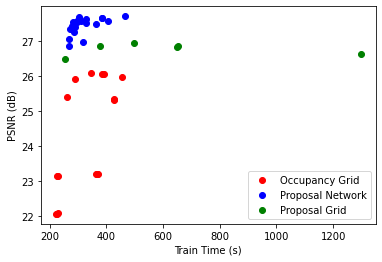

Occupancy Grid [20930, 17672, 3605, 2827, 11907, 7326, 9562, 8488, 29310, 32420, 7367, 17269, 27198, 9609, 6583, 25602]
Proposal Network [29669, 6432, 15934, 17773, 28320, 12530, 15625, 3980, 12070, 17700, 18247, 32414, 5588, 29908, 23941, 10089, 70, 6283, 940, 24194]
Proposal Grid [6762, 5935, 6127, 9105, 11862, 23441]


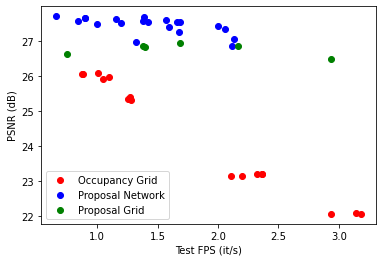

In [2]:
def load_data(
    method, dataset, xlabel="train_time_total", ylabel="test_psnr_avg"
):
    if dataset == "synthetic":
        scenes = NERF_SYNTHETIC_SCENES
    elif dataset == "unbounded":
        scenes = MIPNERF360_UNBOUNDED_SCENES
    else:
        raise ValueError("Unknown dataset")

    seeds = os.listdir(
        os.path.join(
            "/home/ruilongli/workspace/nerfacc/outputs",
            data_dir[method],
            scenes[0],
        )
    )
    seeds = [int(seed.split(".")[0]) for seed in seeds]

    Xs, Ys, seeds_used = [], [], []
    for seed in seeds:
        paths = [
            os.path.join(
                "/home/ruilongli/workspace/nerfacc/outputs",
                data_dir[method],
                scene,
                f"{seed:05d}.json",
            )
            for scene in scenes
        ]
        if any([not os.path.exists(path) for path in paths]):
            continue

        y_mean = []
        x_mean = []
        for path in paths:
            with open(path) as f:
                data = json.load(f)
                y_mean.append(data[ylabel])
                x_mean.append(data[xlabel])
        y_mean = sum(y_mean) / len(y_mean)
        x_mean = sum(x_mean) / len(x_mean)
        Xs.append(x_mean)
        Ys.append(y_mean)
        seeds_used.append(seed)
    return Xs, Ys, seeds_used


for dataet in ["synthetic", "unbounded"]:
    print(dataet)
    for method in methods:
        Xs, Ys, seeds_used = load_data(
            method, dataet, xlabel="train_time_total", ylabel="test_psnr_avg"
        )
        print(method, seeds_used)
        plt.scatter(Xs, Ys, label=method, c=cdict[method])
        # for X, Y, seed in zip(Xs, Ys, seeds_used):
        #     plt.annotate(f"ID:{seed:05d}", (X, Y))

    plt.xlabel("Train Time (s)")
    plt.ylabel("PSNR (dB)")
    plt.legend()
    plt.show()

    for method in methods:
        Xs, Ys, seeds_used = load_data(
            method, dataet, xlabel="test_fps", ylabel="test_psnr_avg"
        )
        print(method, seeds_used)
        plt.scatter(Xs, Ys, label=method, c=cdict[method])
        # for X, Y, seed in zip(Xs, Ys, seeds_used):
        #     plt.annotate(f"ID:{seed:05d}", (X, Y))

    plt.xlabel("Test FPS (it/s)")
    plt.ylabel("PSNR (dB)")
    plt.legend()
    plt.show()